In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# def convolve(in1, in2):
#     """
#     Convolve two N-dimensional arrays.
#     Convolve `in1` and `in2`, with the output size determined by the
#     `mode` argument.
#     Parameters
#     ----------
#     in1 : array_like
#         First input.
#     in2 : array_like
#         Second input. Should have the same number of dimensions as `in1`.
#     Returns
#     -------
#     convolve : array
#         An N-dimensional array containing a subset of the discrete linear
#         convolution of `in1` with `in2`.
#     """
#     volume = np.asarray(in1)
#     kernel = np.asarray(in2)

#     if volume.ndim == kernel.ndim == 0:
#         return volume * kernel
#     elif volume.ndim != kernel.ndim:
#         raise ValueError("volume and kernel should have the same dimensionality")

#     if volume.shape[0] < kernel.shape[0]:
#         # Convolution is commutative; order doesn't have any effect on output
#         volume, kernel = kernel, volume
        
#     kernel = kernel[::-1]
    
#     imgOut = np.zeros_like(volume)
#     for col in range(volume.shape[0] - kernel.shape[0]):
#         value = kernel * volume[col : (col + kernel.shape[0])]
#         imgOut[col] = value.sum ()
#     return imgOut

In [3]:
def convolve(in1, in2):
    """
    Convolve two N-dimensional arrays.
    Convolve `in1` and `in2`, with the output size
    Parameters
    ----------
    in1 : array_like
        First input.
    in2 : array_like
        Second input. Should have the same number of dimensions as `in1`.
    Returns
    -------
    convolve : array
        An N-dimensional array containing a subset of the discrete linear
        convolution of `in1` with `in2`.
    """
    volume = np.asarray(in1)
    kernel = np.asarray(in2)

    if volume.ndim == kernel.ndim == 0:
        return volume * kernel
    elif volume.ndim != kernel.ndim:
        raise ValueError("volume and kernel should have the same dimensionality")
        
    if volume.shape[0] < kernel.shape[0]:
        # Convolution is commutative; order doesn't have any effect on output
        volume, kernel = kernel, volume
        
        
    w = np.zeros(len(volume) + len(kernel) - 1)

    for i in range(len(w)):
        sum = 0
        for j in range(len(volume)):
            if (i - j >= 0 and i - j < len(kernel)):
                sum += volume[j] * kernel[i - j]
        w[i] = sum

    return w

In [4]:
sig = np.repeat([0., 1., 0.], 100)
win = signal.hann(50)
filtered = convolve(sig, win) / sum(win)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


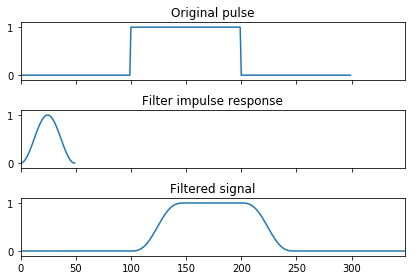

In [5]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

In [6]:
sig = np.repeat([0., 1., 0.], 100)
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='full') / sum(win)

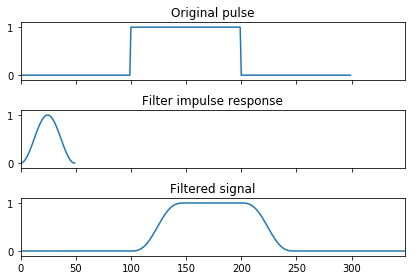

In [7]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

In [8]:
# print(len(sig))
# print(sig)

In [9]:
# print(len(win))
# print(win)

In [10]:
# print(len(filtered))
# print(filtered)